# Analysis with Taylor Swift - You Belong With Me

- Features: YIN, spectrogram, MFCC, Chroma
- Alignment DTW
- Visualization SSM

# Load Audio Files

In [5]:
import os
import librosa
import numpy as np
import libfmp.c4
import matplotlib.pyplot as plt
import IPython.display as ipd

from ssm import compute_sm_dot, plot_feature_ssm


Fs = 22050
N, H = 4096, 1024

# File 1
fn_wav = os.path.join('example_audio', 'taylor_swift_1.wav')
x, Fs = librosa.load(fn_wav, Fs) 
x_duration_1 = (x.shape[0])/Fs # duration in second

# File 2
fn_wav_2 = os.path.join('example_audio', 'taylor_swift_2.wav')
x_2, Fs = librosa.load(fn_wav_2, Fs) 
x_duration_2 = (x.shape[0])/Fs # duration in second

# File 3
fn_wav_3 = os.path.join('example_audio', 'taylor_swift_3.wav')
x_3, Fs = librosa.load(fn_wav_3, Fs) 
x_duration_3 = (x.shape[0])/Fs # duration in second


print(fn_wav)
ipd.display(ipd.Audio(x, rate=Fs))
print(fn_wav_2)
ipd.display(ipd.Audio(x_2, rate=Fs))
print(fn_wav_3)
ipd.display(ipd.Audio(x_3, rate=Fs))

/tmp/ipykernel_19787/1084632670.py:16: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x, Fs = librosa.load(fn_wav, Fs)
/tmp/ipykernel_19787/1084632670.py:21: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_2, Fs = librosa.load(fn_wav_2, Fs)
/tmp/ipykernel_19787/1084632670.py:26: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_3, Fs = librosa.load(fn_wav_3, Fs)


example_audio/taylor_swift_1.wav


example_audio/taylor_swift_2.wav


example_audio/taylor_swift_3.wav


# Spectrogram & F0

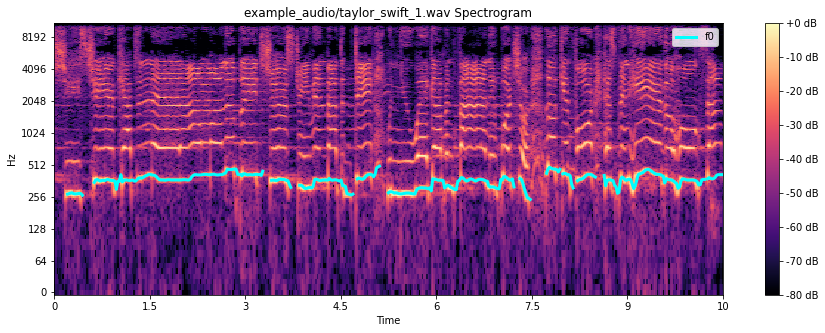

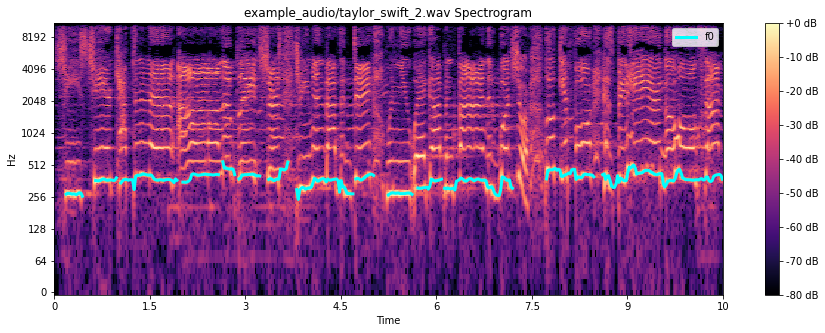

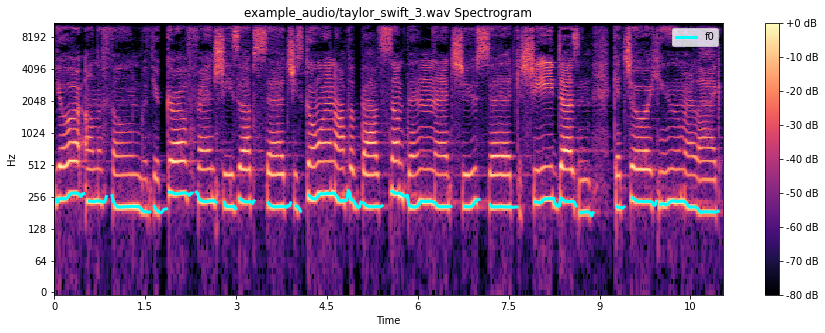

In [8]:
import librosa.display

D = np.abs(librosa.stft(x))
D_dB = librosa.amplitude_to_db(D, ref=np.max)

f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(D_dB, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title=f'{fn_wav} Spectrogram')
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

D_2 = np.abs(librosa.stft(x_2))
D_dB_2 = librosa.amplitude_to_db(D_2, ref=np.max)
f0_2, voiced_flag_2, voiced_probs_2 = librosa.pyin(x_2, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
times_2 = librosa.times_like(f0_2)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(D_dB_2, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title=f'{fn_wav_2} Spectrogram')
ax.plot(times_2, f0_2, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

D_3 = np.abs(librosa.stft(x_3))
D_dB_3 = librosa.amplitude_to_db(D_3, ref=np.max)

f0_3, voiced_flag_3, voiced_probs_3 = librosa.pyin(x_3, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
times_3 = librosa.times_like(f0_3)
# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(D_dB_3, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title=f'{fn_wav_3} Spectrogram')
ax.plot(times_3, f0_3, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

# Mel-Spectrogram

[Text(0.5, 1.0, 'example_audio/taylor_swift_3.wav Mel-Spectrogram')]

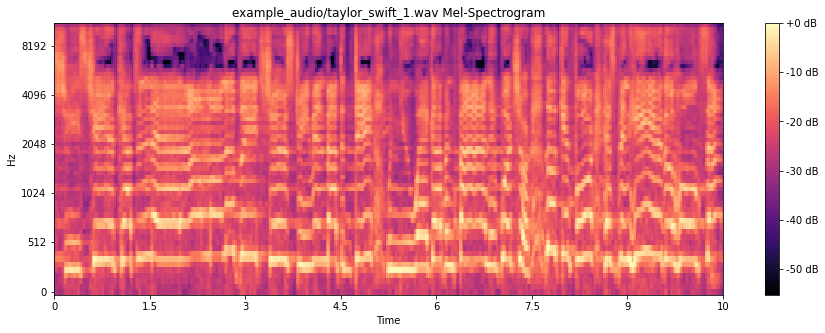

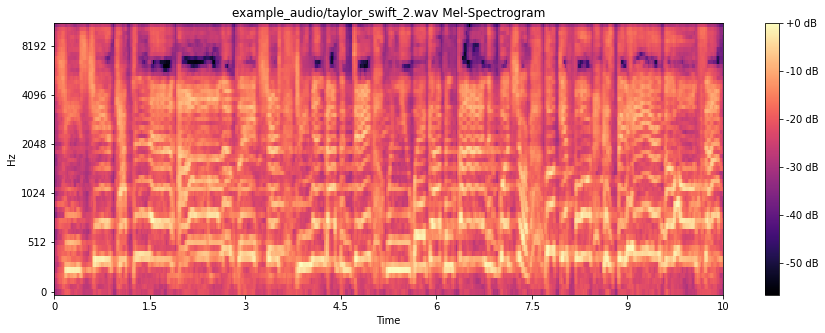

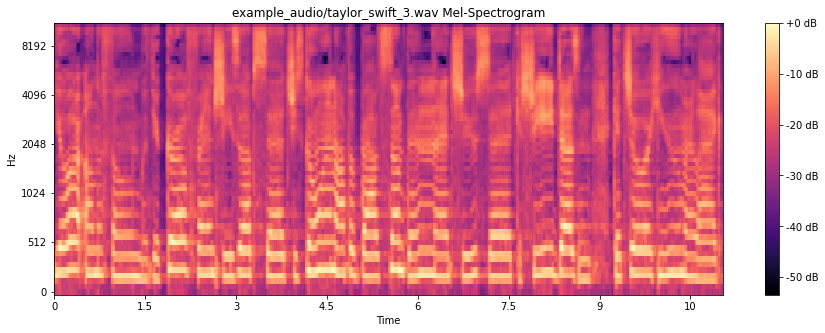

In [9]:
# Mel spectrogram
S = librosa.feature.melspectrogram(S=D, sr=Fs, n_mels=60) # n_mels= 60
S_dB = librosa.power_to_db(S, ref=np.max)

# Mel spectrogram
S_2 = librosa.feature.melspectrogram(S=D_2, sr=Fs, n_mels=60) # n_mels= 60
S_dB_2 = librosa.power_to_db(S_2, ref=np.max)

# Mel spectrogram
S_3 = librosa.feature.melspectrogram(S=D_3, sr=Fs, n_mels=60) # n_mels= 60
S_dB_3 = librosa.power_to_db(S_3, ref=np.max)


# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title=f'{fn_wav} Mel-Spectrogram')

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(S_dB_2, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title=f'{fn_wav_2} Mel-Spectrogram')

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(S_dB_3, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title=f'{fn_wav_3} Mel-Spectrogram')

# MFCC

[Text(0.5, 1.0, 'example_audio/taylor_swift_3.wav MFCC')]

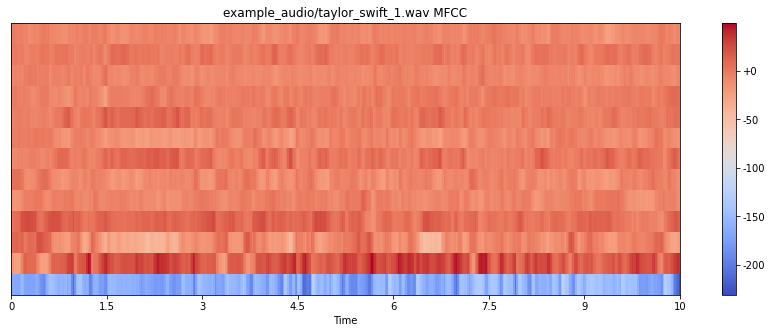

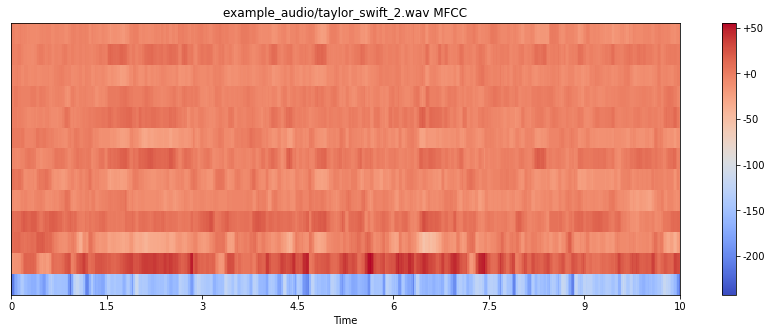

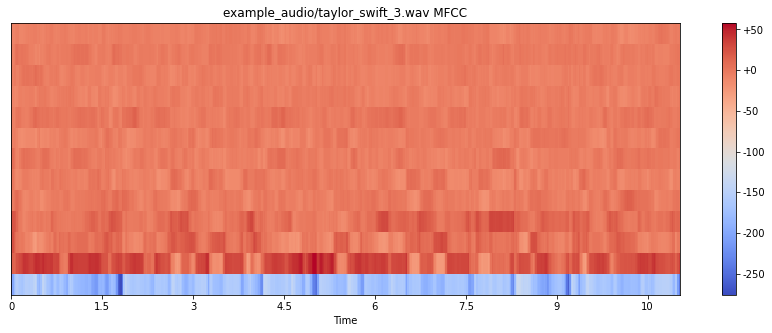

In [10]:
mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=13)  
mfcc_2 = librosa.feature.mfcc(S=S_dB_2, n_mfcc=13)  
mfcc_3 = librosa.feature.mfcc(S=S_dB_3, n_mfcc=13)  

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f")
ax.set(title=f'{fn_wav} MFCC')

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(mfcc_2, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f")
ax.set(title=f'{fn_wav_2} MFCC')

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(mfcc_3, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f")
ax.set(title=f'{fn_wav_3} MFCC')

# Chroma

[Text(0.5, 1.0, 'example_audio/taylor_swift_3.wav Chromagram')]

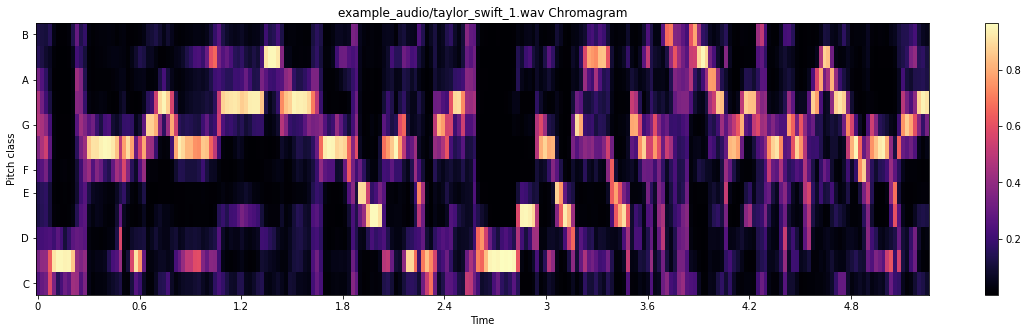

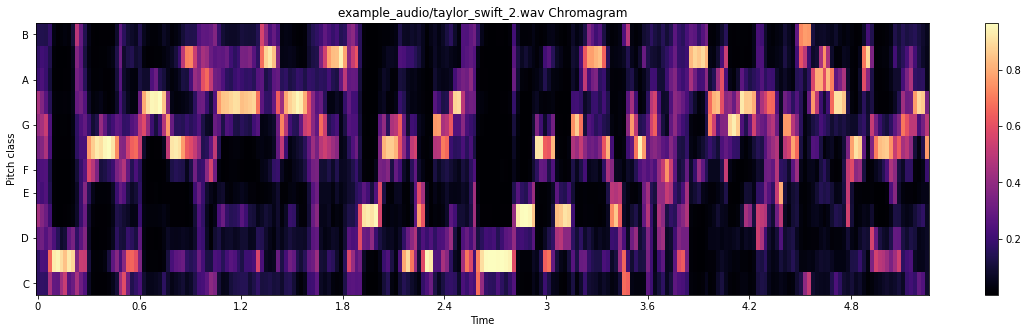

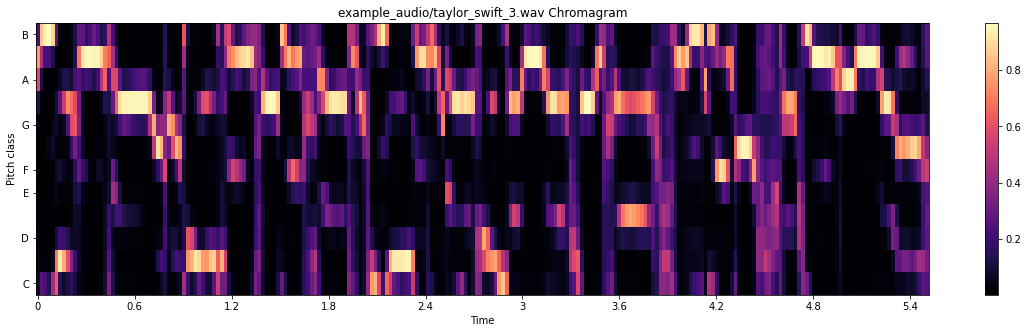

In [11]:
chromagram = librosa.feature.chroma_stft(y=x, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title=f'{fn_wav} Chromagram')

chromagram_2 = librosa.feature.chroma_stft(y=x_2, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(chromagram_2, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title=f'{fn_wav_2} Chromagram')

chromagram_3 = librosa.feature.chroma_stft(y=x_3, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(chromagram_3, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title=f'{fn_wav_3} Chromagram')

# SSM from Chroma

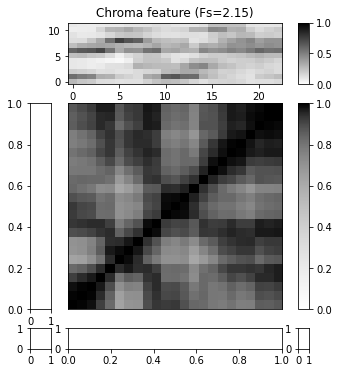

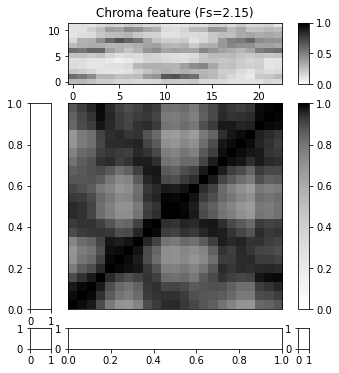

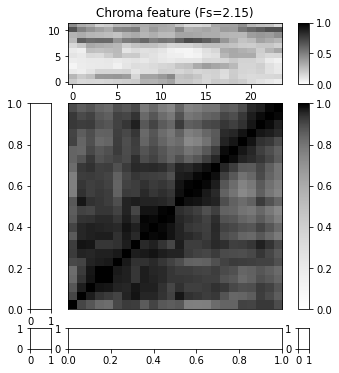

In [12]:
X, Fs_X = libfmp.c3.smooth_downsample_feature_sequence(chromagram, Fs/H, filt_len=41, down_sampling=10)
X_2, Fs_X_2 = libfmp.c3.smooth_downsample_feature_sequence(chromagram_2, Fs/H, filt_len=41, down_sampling=10)
X_3, Fs_X_3 = libfmp.c3.smooth_downsample_feature_sequence(chromagram_3, Fs/H, filt_len=41, down_sampling=10)


X = libfmp.c3.normalize_feature_sequence(X, norm='2', threshold=0.001)
X_2 = libfmp.c3.normalize_feature_sequence(X_2, norm='2', threshold=0.001)
X_3 = libfmp.c3.normalize_feature_sequence(X_3, norm='2', threshold=0.001)

S = compute_sm_dot(X,X)
fig, ax = plot_feature_ssm(X, 1, S, 1, x_duration_1*Fs_X,
                           clim_X=[0,1], clim=[0,1], label='Time (frames)',
                           title='Chroma feature (Fs=%0.2f)'%Fs_X)

S = compute_sm_dot(X_2,X_2)
fig, ax = plot_feature_ssm(X_2, 1, S, 1, x_duration_2*Fs_X,
                           clim_X=[0,1], clim=[0,1], label='Time (frames)',
                           title='Chroma feature (Fs=%0.2f)'%Fs_X)
S_3 = compute_sm_dot(X_3,X_3)
fig, ax = plot_feature_ssm(X_3, 1, S_3, 1, x_duration_3*Fs_X,
                           clim_X=[0,1], clim=[0,1], label='Time (frames)',
                           title='Chroma feature (Fs=%0.2f)'%Fs_X)

# DTW from Chroma

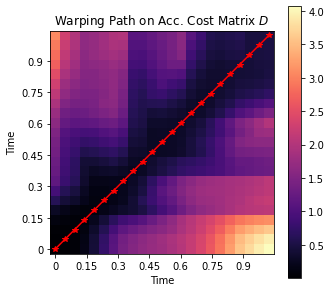

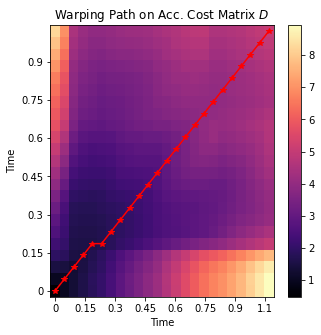

In [13]:
import librosa.display
D, wp = librosa.sequence.dtw(X=X, Y=X_2, metric='cosine')
wp_s = np.asarray(wp) * H / Fs

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time', hop_length=H) # plot cost matrix
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='*', color='r')  # plot the warping path
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()

D, wp = librosa.sequence.dtw(X=X, Y=X_3, metric='cosine')
wp_s = np.asarray(wp) * H / Fs

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time', hop_length=H) # plot cost matrix
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='*', color='r')  # plot the warping path
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()

# Similarity Matrix from Spectrogram

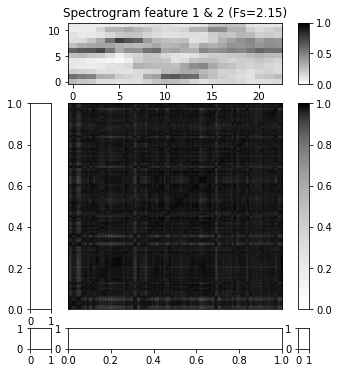

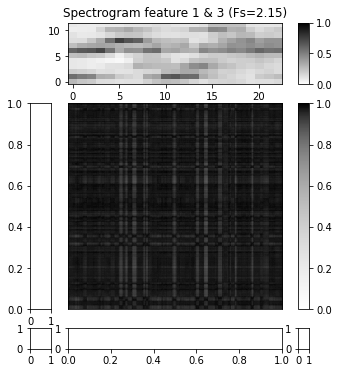

In [55]:
D_dB_n = libfmp.c3.normalize_feature_sequence(D_dB, norm='2', threshold=0.001)
D_dB_n_2 = libfmp.c3.normalize_feature_sequence(D_dB_2, norm='2', threshold=0.001)
D_dB_n_3 = libfmp.c3.normalize_feature_sequence(D_dB_3, norm='2', threshold=0.001)

S = compute_sm_dot(D_dB_n,D_dB_n_2)
fig, ax = plot_feature_ssm(X, 1, S, 1, x_duration_1*Fs_X,
                           clim_X=[0,1], clim=[0,1], label='Time (frames)',
                           title='Spectrogram feature 1 & 2 (Fs=%0.2f)'%Fs_X)

S = compute_sm_dot(D_dB_n,D_dB_n_3)
fig, ax = plot_feature_ssm(X, 1, S, 1, x_duration_1*Fs_X,
                           clim_X=[0,1], clim=[0,1], label='Time (frames)',
                           title='Spectrogram feature 1 & 3 (Fs=%0.2f)'%Fs_X)

In [ ]:
# TEST: DO IT with your own dataset and hypothesis!!!!!!